# Machine Learning Algorithm Comparison 

Link for the dataset used - https://www.kaggle.com/c/titanic/data

**Note:** The dataset is pre-divided into `train.csv` and `test.csv`. The `train.csv` file contains labelled data for building and training the models, while the `test.csv` file is used for evaluation and prediction. Both files will be loaded and processed separately where appropriate.

### 1. Introduction 

#### 1.1 Brief introduction and defining the problem

The sinking of the RMS Titanic on April 15, 1912, remains one of the most infamous maritime disasters in modern history, claiming the lives of over 1,500 passengers and crew. Beyond its historical significance, this tragedy exposed systemic gaps in maritime safety regulations, leading to major reforms. Factors such as gender, age, socioeconomic status, and ticket fare played critical roles in determining ones survival outcomes.

In this project I aim to explore the Kaggle Titanic dataset and utilise machine learning models to predict passenger survival. Through data analysis and supervised learning techniques, my goal is to identify key features influencing survival rate, compare and evaluate the performance of different machine learning models, and draw conclusions into the factors that contributed survival possibilities. 

### 2. Setup and prerequisites

#### 2.1 Installing required libraries

In [12]:
# Install required libraries (only if not already installed)
! pip install pandas numpy scikit-learn matplotlib kagglehub seaborn streamlit plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


#### 2.2 Importing the libraries 

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

### 3. Data loading and exploration 

**Note:** 

The Titanic dataset is originally divided into `train.csv` and `test.csv`. However, the `test.csv` dataset does not include survival labels, as it is intended for competition use where the goal is to predict survival outcomes and compare them against the hidden labels. This makes it unsuitable for evaluating model performance directly. 

To address this, I will split the `train.csv` dataset into custom training and evaluation subsets (80% training and 20% testing). This approach ensures that both subsets include survival labels (`Survived`), enabling me to train the models on one subset and assess their performance on the other.

Alternatively, I could have employed **K-Fold Cross-Validation**, a widely-used technique that splits the data into multiple folds, training and testing the model on different combinations of these folds to ensure robustness. While effective, I have chosen a simpler train-test split for clarity and ease of implementation, aligning with the objectives of this project.

#### 3.1 Loading the dataset

In [6]:
# Load the Titanic datasets
train_data = pd.read_csv("Titanic Dataset/train.csv")

# Display the first few rows
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.2 Checking missing values

In [21]:
from IPython.display import display

# Display missing values
display(train_data.isnull().sum())

# Display dataset info
train_data.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The output above indicates the presence of missing values in the 'Age', 'Cabin', and 'Embarked' columns. These missing values will require appropriate handling to ensure the dataset is complete and suitable for analysis. 

#### 3.3 Dataset overview 

In [17]:
# Summary statistics of numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations from summary statistics: 

The summary statistics provide an overview of the numerical features in the dataset including: 

1. Passenger count: THe dataset contains data for 891 passengers, as shown by the count in the columns 

##### 3.3.1 Types of features 

In [4]:
# Load the Titanic dataset
train_data = pd.read_csv("Titanic Dataset/train.csv")

# Display the first few rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Exploratory Data Analysis (EDA)

#### 4.1 Visualising missing data

#### 4.2 Univariate Analysis 

#### 4.3 Bivariate Analysis  

#### 4.4 Correlation Analysis 

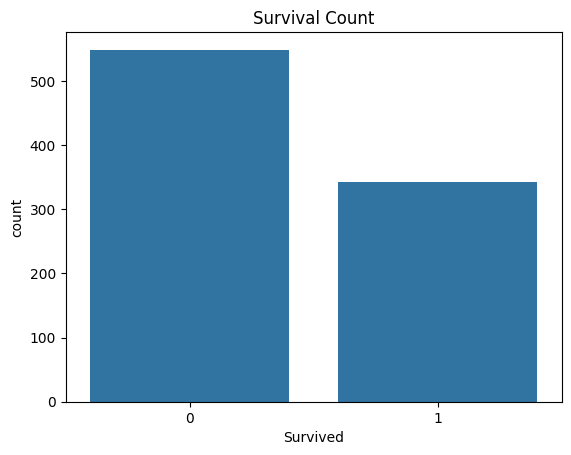

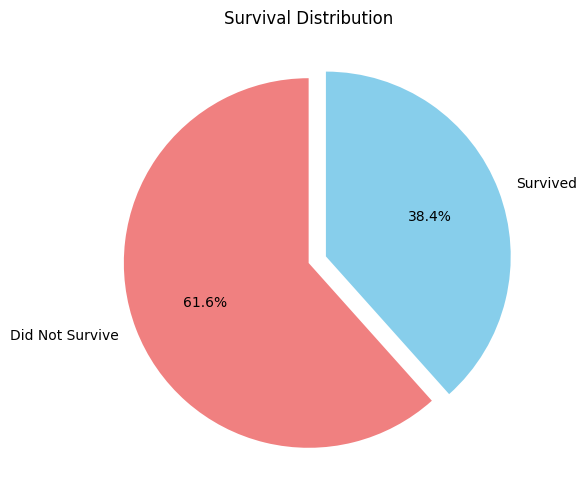

In [22]:
#Visualise survival distribution in a bar chart 
sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.show()

#Visualise survival distribution in a pie chart 
# Calculate proportions for survival
survival_counts = train_data['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'skyblue']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title("Survival Distribution")
plt.show()

It is very unfortunate but clear to see from both the pie chart and bar graph that only 38.4% of passengers survived, which is roughly 350 out of the 891 passengers in the dataset. This indicates that the majority of passengers, around 61.6%, did not survive the tragedy.

To gain deeper insights, it’s important to investigate how various features of the dataset influenced the survival rate. Certain characteristics such as Sex, Passenger Class (Pclass), Age, and Port of Embarkation might have played a significant role in determining survival odds. By analysing these features, we can uncover potential patterns or trends that contributed to survival.

Next, we will delve into the survival rates by feature categories, starting with Sex, Pclass, and Age, to identify any disparities or correlations that can help us better understand the dataset.


In [19]:
# View dataset info (data types, non-null counts, etc.)
train_data.info()

# Summary statistics of numerical columns
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Upon exploring the dataset using info() and describe(), it is evident that the Titanic dataset consists of 12 columns and 891 rows, with a mix of numerical and categorical features. Key features include Sex, Pclass, Age, Fare, and Embarked, while the target variable, Survived, indicates whether a passenger survived (1) or not (0). A closer look reveals some missing data, with the Age column containing 177 missing values, the Cabin column having a significant number of missing entries (only 204 non-null values), and Embarked missing just 2 values. This highlights the need for data cleaning and imputation.

From the summary statistics, we observe that the average passenger age is around 29.7 years, ranging from a minimum of 0.42 years (likely a baby) to a maximum of 80 years. The Fare column exhibits high variability, with an average fare of 32.20 and a maximum fare of 512.33, suggesting potential correlations between ticket price, class, and survival. Most passengers had no siblings, spouses, parents, or children aboard, as indicated by the median values of 0 for both SibSp and Parch.

These observations set the stage for the next steps, which include handling missing values in Age and Embarked, potentially dropping or engineering features from Cabin, and exploring how key features like Sex, Pclass, and Fare influence survival outcomes.

### 5. Data cleaning and preprocessing 

#### 5.1 The 4 C's of Data Cleaning  

##### 5.1.1 Correcting 

##### 5.1.2 Completing 

##### 5.1.3 Creating 

##### 5.1.4 Converting 

#### 5.2 Feature Engineering 

#### 5.3 Encoding categorical variables 

### 6. Model Preparation 

#### 6.1 Splitting the dataset 

#### 6.2 Feature Selection 

#### 6.3 Scaling Feature (Optional)

### 7. Machine learning models 

### 8. Model Evaluation 